In [1]:
#This is a hack to make the %%cpp work inside mybinder.org - ignore
from ROOT import TObject

In [2]:
%%cpp
//Create a c++ object representing a LorentzVector
//More details at https://root.cern.ch/doc/master/classTLorentzVector.html
TLorentzVector v;
//Print the vectors components - should see all components initialised to zero
v.Print()

(x,y,z,t)=(0.000000,0.000000,0.000000,0.000000) (P,eta,phi,E)=(0.000000,0.000000,0.000000,0.000000)


In [3]:
%%cpp
//We see this does not work, because 1 and 2 are integers.
//The template arguments to DeltaPhi must be classes that implement specific methods.
double test = ROOT::Math::VectorUtil::DeltaPhi(1,2)

input_line_56:4:15: error: no matching function for call to 'DeltaPhi'
double test = ROOT::Math::VectorUtil::DeltaPhi(1,2)
              ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
/opt/hep/root/6.30.06/include/Math/GenVector/VectorUtil.h:61:42: note: candidate template ignored: substitution failure [with Vector1 = int, Vector2 = int]: type 'int' cannot be used prior to '::' because it has no members
         inline typename Vector1::Scalar DeltaPhi( const Vector1 & v1, const Vector2 & v2) {
                         ~~~~~~~         ^


In [4]:
%%cpp
//We try deltaphi again, this time with instances of classes that do implement the required methods.
TLorentzVector mark1(0.0,0.0,0.0,0.0);
TLorentzVector mark2(0.0,0.0,0.0,0.0);
double test = ROOT::Math::VectorUtil::DeltaPhi(mark1,mark2);
test

(double) 0.0000000


In [5]:
#Now do the same in python
#Don't forget in python we must import each ROOT C++ class we want to use.
from ROOT import TLorentzVector
mark1 = TLorentzVector(0.0,0.0,0.0,0.0)
mark2 = TLorentzVector(0.0,0.0,0.0,0.0)
from ROOT import Math
#Won't work
Math.VectorUtil.DeltaPhi(1,2)

TypeError: Template method resolution failed:
  Failed to instantiate "DeltaPhi(int,int)"

In [6]:
#Will work
Math.VectorUtil.DeltaPhi(mark1,mark2)

0.0

In [7]:
#Task 1
#Download https://nbviewer.jupyter.org/url/root.cern/doc/master/notebooks/mathcoreVectorCollection.C.nbconvert.ipynb
#and run it.
#Note I spotted the last two cells are missing the %%cpp!

In [8]:
%%cpp
//Magic numbers
//No need to write "double M = 0.13957;" in above example
TDatabasePDG db;
//If everyone uses it, all code uses consistent numbers in calculations - easier to debug your code
//with respect to colleagues codes etc
db.GetParticle(211)->Mass()

(double) 0.13957040


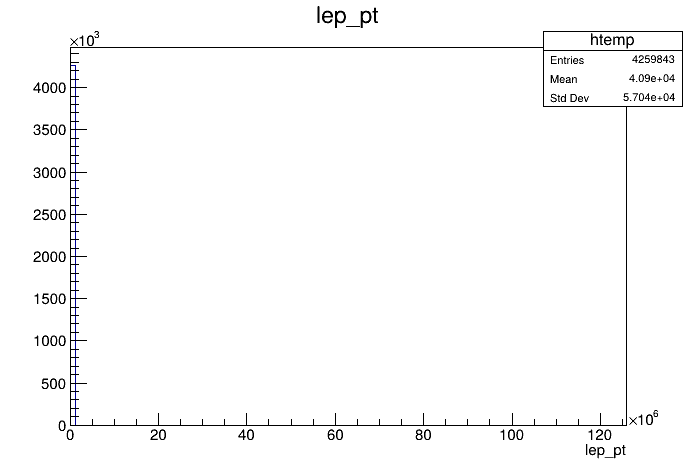

In [4]:
from ROOT import TFile
#You can find more ATLAS open datasets at http://opendata.atlas.cern/extendedanalysis/datasets.php
#You can open this directly via the URL - note its likely faster to have a local copy wherever you run
#the notebook
zMuMuFile = TFile.Open("https://atlas-opendata.web.cern.ch/Legacy13TeV/2lep/MC/mc_364100.Zmumu_PTV0_70_CVetoBVeto.2lep.root")
myTree = zMuMuFile.Get("mini;1")
from ROOT import TCanvas
can = TCanvas()
can.cd()
myTree.Draw("lep_pt")
#If reading over URL, be patient - will take a few minutes for plot to appear!
can.Draw()

In [ ]:
#Task 2
#Use the Zmumu open data to plot the invariant mass of ZCandidates
#Hints: The Z always decays to two muon particles in this Monte Carlo Simulation. 
#Hints: The reconstructed muon candidates are represented by the lep_ variables.

In [ ]:
%%cpp
//Roofit in C++
//Each variable, RooRealVar, has a name, title and range
//mes has the name "mes" and title "m_{ES} (GeV)" - we specify the range to be in 5.20 and 5.30
//the initial value of the variable will be in the mid-point of that range
RooRealVar mes("mes","m_{ES} (GeV)",5.20,5.30);
//We can also specify the initial value of a variable - so for sigmean we specify 5.28 and again 
//a range between 5.20 and 5.30
RooRealVar sigmean("sigmean","B^{#pm} mass",5.28,5.20,5.30);
RooRealVar sigwidth("sigwidth","B^{#pm} width",0.0027,0.001,1.);
//Create a PDF of a Gaussian shape using mes as our data with a mean and width of sigmean and sigwitdh
RooGaussian gauss("gauss","gaussian PDF",mes,sigmean,sigwidth);

In [ ]:
%%cpp
//Now lets proceed to draw our PDF
//First we get a pointer to a RooPlot object, from the RooRealVar mes
RooPlot* frame = mes.frame();
//Ten we plot our PDF, gauss, onto that RooPlotObject
gauss.plotOn(frame);
//Then as usual we can create a TCanvas and draw both the RooPlot object and the canvas.
TCanvas rooCan;
frame->Draw();
rooCan.Draw()

In [ ]:
#Roofit example, this time in python
#Again note the main difference is that we need to import each c++ class explicitly,
#and that variable declaration has a different syntax.
#Also note we don't worry about whether a variable is a pointer or not - the "->" and "." syntax in c++
#Here, in python, we just always use "."
from ROOT import RooRealVar
mes = RooRealVar("mes","m_{ES} (GeV)",5.20,5.30)
sigmean = RooRealVar("sigmean","B^{#pm} mass",5.28,5.20,5.30)
sigwidth = RooRealVar("sigwidth","B^{#pm} width",0.0027,0.001,1.)
from ROOT import RooGaussian
gauss = RooGaussian("gauss","gaussian PDF",mes,sigmean,sigwidth)

In [ ]:
frame = mes.frame()
gauss.plotOn(frame)
from ROOT import TCanvas
rooCan = TCanvas()
frame.Draw()
rooCan.Draw()

In [ ]:
#Task3
#Create a Landau PDF, along with appropriate parameters and repeat the above workflow shown for the Gaussian case.

In [ ]:
#Roofit example with signal and background shapes
argpar = RooRealVar("argpar","argus shape parameter",-20.0,-100.,-1.)
#This time we also create a parameter with a fixed value using the RooConstVar class
from ROOT import RooConstVar
argconst = RooConstVar("argconst","argus constant",5.291)
#Our background shape will be an Argus function
from ROOT import RooArgusBG
argus = RooArgusBG("argus","Argus PDF",mes,argconst,argpar)
#Eventually we will combine our background and signal shapes
#So we create variables to weight those shapes
nsig = RooRealVar("nsig","#signal events",200,0.,10000)
nbkg = RooRealVar("nbkg","#background events",800,0.,10000) 
from ROOT import RooAddPdf,RooArgList
#Finally we create the full shape which is the sum of a background (Argus) and signal (Gaussian)
#The background and signal are weighted by nbkg and nsig
sum = RooAddPdf("sum","g+a",RooArgList(gauss,argus),RooArgList(nsig,nbkg))

In [ ]:
from ROOT import RooArgSet
#The generate function allows us to generate some Monte Carlo ("toy Monte Carlo") events using the PDF shape
data = sum.generate(RooArgSet(mes),2000)
#Then we can fit the shape to that toy MC data (uses extended ML fit)
sum.fitTo(data)
mesframe = mes.frame()
from ROOT import RooFit,kDashed
#We plot three things - the toy MC data, the full background + signal fitted shape, and the Argus fitted shape
#Try commenting them out, and doing it one by one to see what they do!
data.plotOn(mesframe)
sum.plotOn(mesframe)
sum.plotOn(mesframe,RooFit.Components("argus"),RooFit.LineStyle(kDashed))
rooCan.Clear()
mesframe.Draw()
#Hint - scroll down to see the plot!
rooCan.Draw()

In [ ]:
from ROOT import TFile
#Lets get the tree2 file again
filePython = TFile("../Lecture1/tree2.root")
#define a variable with an appropriate range
destep = RooRealVar("destep","destep",15e-06,25e-06)
from ROOT import RooDataSet
#Get the TTree
t2 = filePython.Get("t2;1")
#Then we can generate a RooDataset from the TTree and the variable destep
data = RooDataSet("data","data",t2,destep)

In [ ]:
#Get a frame from our variable and plot the data on it
newFrame = destep.frame()
data.plotOn(newFrame)
#Then draw the fram on our canvas
newFrame.Draw()
rooCan.Draw()

In [ ]:
#Task3
#Set up a PDF shape and use it to fit the destep data.
#What kind of shape works well?
#Try it again using the native ROOT fit functionality we saw in previous lectures to compare the methodologies.